<a href="https://colab.research.google.com/github/jacksonguedes/PIVIC/blob/main/2%C2%AA_Parte_do_PIVIC_com_novas_medi%C3%A7%C3%B5es_e_novos_para_raios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt
import numpy as np

# Medições depois de 2h

In [130]:
dados_canal_H1_Osc_1 = pd.read_csv("F0105CH1.CSV",  sep=",") # Tensão aplicada aos Para-Raios  Osciloscópio 1
dados_canal_H2_Osc_1 = pd.read_csv("F0105CH2.CSV",  sep=",") # PR - A  Osciloscópio 1
dados_canal_H3_Osc_1 = pd.read_csv("F0105CH3.CSV",  sep=",") # PR - B  Osciloscópio 1
dados_canal_H4_Osc_1 = pd.read_csv("F0105CH4.CSV",  sep=",") # PR - C  Osciloscópio 1
dados_canal_H2_Osc_2 = pd.read_csv("F0045CH2.CSV",  sep=",") # PR - D  Osciloscópio 2
dados_canal_H3_Osc_2 = pd.read_csv("F0045CH3.CSV",  sep=",") # PR - E  Osciloscópio 2

# Fazendo uma cópia dos dados
novo_CH1_Osc_1 = dados_canal_H1_Osc_1.copy()
novo_CH2_Osc_1 = dados_canal_H2_Osc_1.copy()
novo_CH3_Osc_1 = dados_canal_H3_Osc_1.copy()
novo_CH4_Osc_1 = dados_canal_H4_Osc_1.copy()
novo_CH2_Osc_2 = dados_canal_H2_Osc_2.copy()
novo_CH3_Osc_2 = dados_canal_H3_Osc_2.copy()

In [131]:
novo_CH1_Osc_1.columns = ["A", "B", "C", "Tempo1", "Amplitude1", "F"]
novo_CH2_Osc_1.columns = ["A", "B", "C", "Tempo2", "Amplitude2", "F"]
novo_CH3_Osc_1.columns = ["A", "B", "C", "Tempo3", "Amplitude3", "F"]
novo_CH4_Osc_1.columns = ["A", "B", "C", "Tempo4", "Amplitude4", "F"]
novo_CH2_Osc_2.columns = ["A", "B", "C", "Tempo5", "Amplitude5", "F"]
novo_CH3_Osc_2.columns =  ["A", "B", "C", "Tempo6", "Amplitude6", "F"]

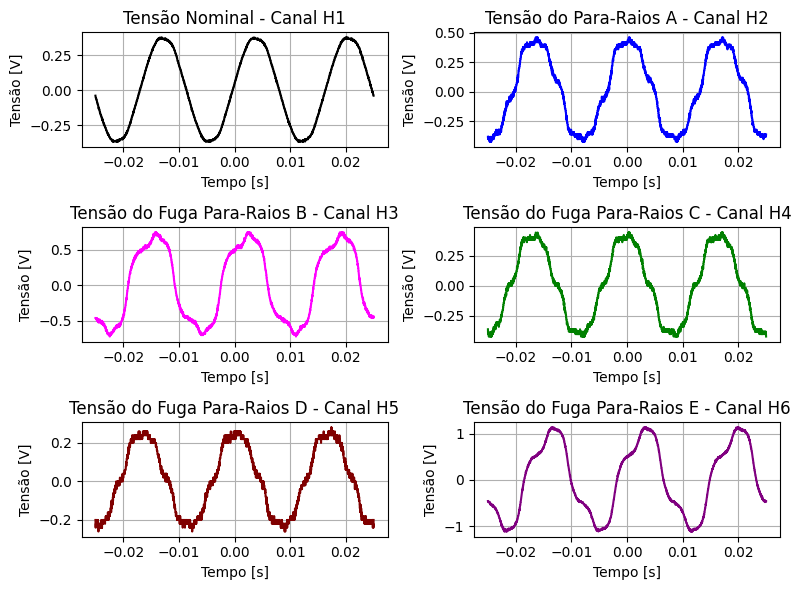

In [132]:
# Dados para CH1
tempo1 = novo_CH1_Osc_1['Tempo1']
amplitude1 = novo_CH1_Osc_1['Amplitude1']

# Dados para CH2
tempo2 = novo_CH2_Osc_1['Tempo2']
amplitude2 = novo_CH2_Osc_1['Amplitude2']

# Dados para CH3
tempo3 = novo_CH3_Osc_1['Tempo3']
amplitude3 = novo_CH3_Osc_1['Amplitude3']

# Dados para CH4
tempo4 = novo_CH4_Osc_1['Tempo4']
amplitude4 = novo_CH4_Osc_1['Amplitude4']

# Dados para CH2
tempo5 = novo_CH2_Osc_2['Tempo5']
amplitude5 = novo_CH2_Osc_2['Amplitude5']

# Dados para CH3
tempo6 = novo_CH3_Osc_2['Tempo6']
amplitude6 = novo_CH3_Osc_2['Amplitude6']

# Criar subplots
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Plotar CH1
axs[0, 0].plot(tempo1, amplitude1, color='black')
axs[0, 0].set_xlabel('Tempo [s]')
axs[0, 0].set_ylabel('Tensão [V]')
axs[0, 0].set_title('Tensão Nominal - Canal H1')
axs[0, 0].grid()

# Plotar CH2
axs[0, 1].plot(tempo2, amplitude2, color='blue')
axs[0, 1].set_xlabel('Tempo [s]')
axs[0, 1].set_ylabel('Tensão [V]')
axs[0, 1].set_title('Tensão do Para-Raios A - Canal H2')
axs[0, 1].grid()

# Plotar CH3
axs[1, 0].plot(tempo3, amplitude3, color='magenta')
axs[1, 0].set_xlabel('Tempo [s]')
axs[1, 0].set_ylabel('Tensão [V]')
axs[1, 0].set_title('Tensão do Fuga Para-Raios B - Canal H3')
axs[1, 0].grid()

# Plotar CH4
axs[1, 1].plot(tempo4, amplitude4, color='green')
axs[1, 1].set_xlabel('Tempo [s]')
axs[1, 1].set_ylabel('Tensão [V]')
axs[1, 1].set_title('Tensão do Fuga Para-Raios C - Canal H4')
axs[1, 1].grid()

# Plotar CH2 - Osciloscópio 2
axs[2, 0].plot(tempo5, amplitude5, color='maroon')
axs[2, 0].set_xlabel('Tempo [s]')
axs[2, 0].set_ylabel('Tensão [V]')
axs[2, 0].set_title('Tensão do Fuga Para-Raios D - Canal H5')
axs[2, 0].grid()

# Plotar CH3 - Osciloscópio 2
axs[2, 1].plot(tempo6, amplitude6, color='purple')
axs[2, 1].set_xlabel('Tempo [s]')
axs[2, 1].set_ylabel('Tensão [V]')
axs[2, 1].set_title('Tensão do Fuga Para-Raios E - Canal H6')
axs[2, 1].grid()

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o plot
plt.show()


# Plotando os Gráficos das Correntes de Fuga de cada Para-raios

In [133]:
# Resistência do resistor shunt em ohms
resistencia = 1000  # 1k ohms

# Converter os dados de tensão para corrente usando a Lei de Ohm
corrente_CH2 = novo_CH2_Osc_1['Amplitude2'] / resistencia
corrente_CH3 = novo_CH3_Osc_1['Amplitude3'] / resistencia
corrente_CH4 = novo_CH4_Osc_1['Amplitude4'] / resistencia
corrente_CH5 = novo_CH2_Osc_2['Amplitude5'] / resistencia
corrente_CH6 = novo_CH3_Osc_2['Amplitude6'] / resistencia

# Plotando o Espectro de Frequência da Corrente de Fuga de cada Para-raios

# Canal H1 - Tensão Nominal

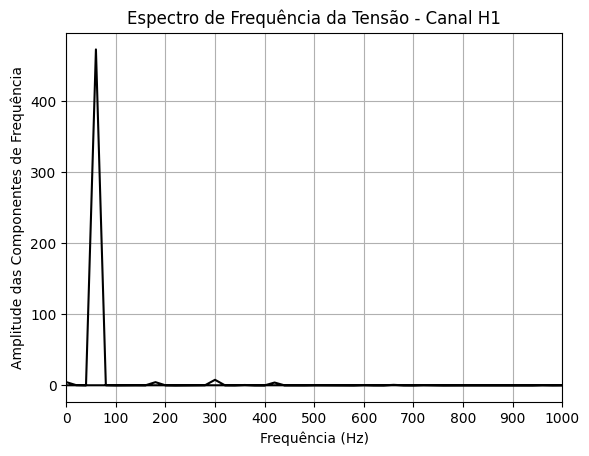

In [134]:
# Extrair tempo e amplitude
tempo1 = novo_CH1_Osc_1['Tempo1']
amplitude1 = novo_CH1_Osc_1['Amplitude1']

# Calcular a FFT
fft_amplitude_tensao = np.fft.fft(amplitude1)

# Ângulos
angulo_tensao = np.angle(fft_amplitude_tensao)

#Valores absolutos
valores_absolutos_tensao = np.abs(fft_amplitude_tensao)

# Calcular as frequências correspondentes
frequencias_tensao = np.fft.fftfreq(len(tempo1), tempo1[1] - tempo1[0])

# Plotar o espectro de frequência
plt.plot(frequencias_tensao, valores_absolutos_tensao, color = 'black')
plt.title('Espectro de Frequência da Tensão - Canal H1')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude das Componentes de Frequência')
plt.grid(True)
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1001, 100))
plt.show()

In [135]:
# Convertendo os ângulos para graus
angulo_graus_tensao = np.degrees(angulo_tensao)

# Listas para salvar os valores de frequência, módulo e ângulo para TENSÃO.
frequencias_salvas_tensao = []
modulos_salvos_tensao = []
angulos_salvos_tensao = []
frequencias_multiplos_60_tensao = []
modulos_multiplos_60_tensao = []
angulos_multiplos_60_tensao = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro da tensão\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for f_tensao, mod_tensao, ang_graus_tensao in zip(frequencias_tensao[frequencias_tensao > 0], valores_absolutos_tensao[frequencias_tensao > 0], angulo_graus_tensao[frequencias_tensao > 0]):

  if (f_tensao > 60) and (f_tensao < 1000) and (mod_tensao > 1):
    print(f"{f_tensao:.2f}\t\t\t{mod_tensao:.2f}\t\t\t{ang_graus_tensao:.2f}°")
    frequencias_salvas_tensao.append(f_tensao)
    modulos_salvos_tensao.append(mod_tensao)
    angulos_salvos_tensao.append(ang_graus_tensao)

Valores do espectro da tensão

Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02			472.24			97.16°
180.07			4.59			112.96°
300.12			7.89			-74.64°
420.17			4.06			72.73°


# Encontrando as frequências de maiores amplitudes

In [136]:
# Encontrar a frequência com a maior amplitude
indice_fundamental_tensao = np.argmax(modulos_salvos_tensao)
frequencia_fundamental_tensao = frequencias_salvas_tensao[indice_fundamental_tensao]

print("Frequência fundamental:", frequencia_fundamental_tensao)

# Listas para armazenar os múltiplos
frequencias_multiplos_tensao = []
modulos_multiplos_tensao = []
angulos_multiplos_tensao = []

# Verificar os múltiplos da frequência fundamental
for i, frequencia in enumerate(frequencias_salvas_tensao):
    if frequencia % frequencia_fundamental_tensao == 0:
        frequencias_multiplos_tensao.append(frequencia)
        modulos_multiplos_tensao.append(modulos_salvos_tensao[i])
        angulos_multiplos_tensao.append(angulos_salvos_tensao[i])

# Imprimir os múltiplos encontrados
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_tensao)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_tensao, modulos_multiplos_tensao, angulos_multiplos_tensao):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t\t {angulo:.2f}")

Frequência fundamental: 60.02400960384398
Múltiplos da frequência fundamental:  60.02400960384398


Frequência (Hz)		Módulo (v)		Ângulo (graus)

60.02		 472.2446463618				 97.16
180.07		 4.5863953339				 112.96
300.12		 7.8884945395				 -74.64
420.17		 4.0551279613				 72.73


# Espectro da Corrente de Fuga do Para-Raios A

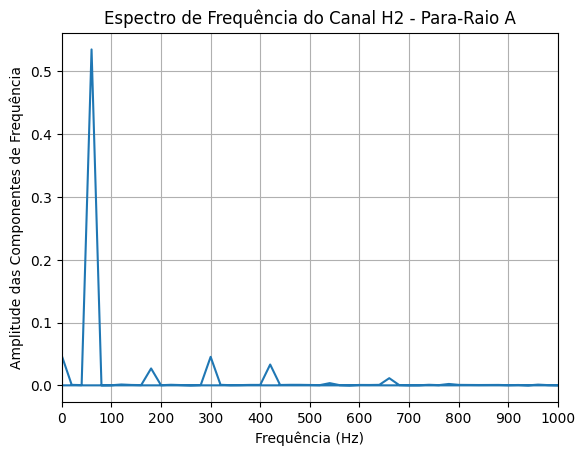

In [137]:
tempo2 = novo_CH2_Osc_1['Tempo2']
amplitude2 = corrente_CH2

# Passo 3: Calcular a FFT
fft_amplitude_Corrente_A = np.fft.fft(amplitude2)

# Ângulos
angulo_Corrente_A = np.angle(fft_amplitude_Corrente_A)

#Valores absolutos
valores_absolutos_Corrente_A = np.abs(fft_amplitude_Corrente_A)

# Passo 4: Calcular as frequências correspondentes
frequencias_Corrente_A = np.fft.fftfreq(len(tempo2), tempo2[1] - tempo2[0])

# Passo 5: Plotar o espectro de frequência
plt.plot(frequencias_Corrente_A, np.abs(fft_amplitude_Corrente_A))
plt.title('Espectro de Frequência do Canal H2 - Para-Raio A')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude das Componentes de Frequência')
plt.grid(True)
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1001, 100))
plt.show()

In [138]:
# Convertendo os ângulos para graus
angulo_graus_Corrente_A = np.degrees(angulo_Corrente_A)

# Listas para salvar os valores de frequência, módulo e ângulo para TENSÃO.
frequencias_salvas_Corrente_A = []
modulos_salvos_Corrente_A = []
angulos_salvos_Corrente_A = []
frequencias_multiplos_60_Corrente_A = []
modulos_multiplos_60_Corrente_A = []
angulos_multiplos_60_Corrente_A = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro da corrente A\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for f_Corrente_A, mod_Corrente_A, ang_graus_Corrente_A in zip(frequencias_Corrente_A[frequencias_Corrente_A > 0], valores_absolutos_Corrente_A[frequencias_Corrente_A > 0], angulo_graus_Corrente_A[frequencias_Corrente_A > 0]):

  if (f_Corrente_A > 60) and (f_Corrente_A < 1000) and (mod_Corrente_A > 2e-3):
    print(f"{f_Corrente_A:.2f}\t\t\t{mod_Corrente_A:.4f}\t\t\t{ang_graus_Corrente_A:.2f}°")
    frequencias_salvas_Corrente_A.append(f_Corrente_A)
    modulos_salvos_Corrente_A.append(mod_Corrente_A)
    angulos_salvos_Corrente_A.append(ang_graus_Corrente_A)

Valores do espectro da corrente A

Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02			0.5349			173.51°
180.07			0.0270			-85.80°
300.12			0.0455			13.12°
420.17			0.0333			162.07°
540.22			0.0036			56.76°
660.26			0.0115			9.20°
780.31			0.0023			65.36°


In [139]:
# Encontrar a frequência com a maior amplitude
indice_fundamental_Corrente_A = np.argmax(modulos_salvos_Corrente_A)
frequencia_fundamental_Corrente_A = frequencias_salvas_Corrente_A[indice_fundamental_Corrente_A]

print("Frequência fundamental:", frequencia_fundamental_Corrente_A)

# Listas para armazenar os múltiplos
frequencias_multiplos_Corrente_A = []
modulos_multiplos_Corrente_A = []
angulos_multiplos_Corrente_A = []

# Verificar os múltiplos da frequência fundamental
for i, frequencia_Corrente_A in enumerate(frequencias_salvas_Corrente_A):
    if frequencia_Corrente_A % frequencia_fundamental_Corrente_A == 0:
        frequencias_multiplos_Corrente_A.append(frequencia_Corrente_A)
        modulos_multiplos_Corrente_A.append(modulos_salvos_Corrente_A[i])
        angulos_multiplos_Corrente_A.append(angulos_salvos_Corrente_A[i])

# Imprimir os múltiplos encontrados
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_Corrente_A)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_Corrente_A, modulos_multiplos_Corrente_A, angulos_multiplos_Corrente_A):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t {angulo:.2f}")

Frequência fundamental: 60.02400960384398
Múltiplos da frequência fundamental:  60.02400960384398


Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02		 0.5349471058			 173.51
180.07		 0.0270247789			 -85.80
300.12		 0.0455222615			 13.12
420.17		 0.0332913148			 162.07
540.22		 0.0036459602			 56.76
660.26		 0.0115467547			 9.20
780.31		 0.0023427921			 65.36


# Espectro da Corrente de Fuga do Para-Raios B

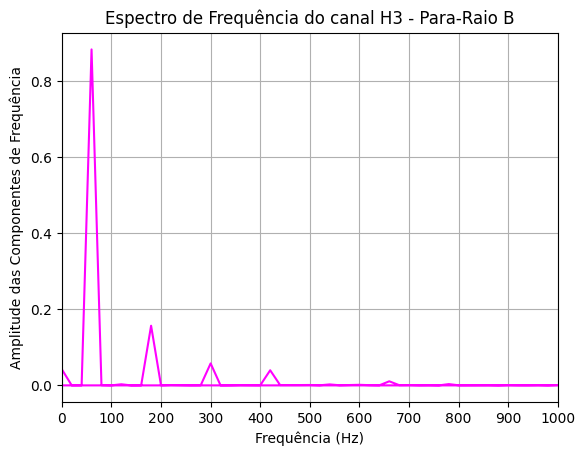

In [140]:
tempo3 = novo_CH3_Osc_1['Tempo3']
amplitude3 = corrente_CH3

# Passo 3: Calcular a FFT
fft_amplitude_Corrente_B = np.fft.fft(amplitude3)

# Ângulos
angulo_Corrente_B = np.angle(fft_amplitude_Corrente_B)

#Valores absolutos
valores_absolutos_Corrente_B = np.abs(fft_amplitude_Corrente_B)

# Passo 4: Calcular as frequências correspondentes
frequencias_Corrente_B = np.fft.fftfreq(len(tempo3), tempo3[1] - tempo3[0])

# Passo 5: Plotar o espectro de frequência
plt.plot(frequencias_Corrente_B, np.abs(fft_amplitude_Corrente_B), color = 'magenta')
plt.title('Espectro de Frequência do canal H3 - Para-Raio B')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude das Componentes de Frequência')
plt.grid(True)
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1001, 100))
plt.show()

In [141]:
# Convertendo os ângulos para graus
angulo_graus_Corrente_B = np.degrees(angulo_Corrente_B)

# Listas para salvar os valores de frequência, módulo e ângulo para TENSÃO.
frequencias_salvas_Corrente_B = []
modulos_salvos_Corrente_B = []
angulos_salvos_Corrente_B = []
frequencias_multiplos_60_Corrente_B = []
modulos_multiplos_60_Corrente_B = []
angulos_multiplos_60_Corrente_B = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro da corrente B\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for f_Corrente_B, mod_Corrente_B, ang_graus_Corrente_B in zip(frequencias_Corrente_B[frequencias_Corrente_B > 0], valores_absolutos_Corrente_B[frequencias_Corrente_B > 0], angulo_graus_Corrente_B[frequencias_Corrente_B > 0]):

  if (f_Corrente_B > 60) and (f_Corrente_B < 1000) and (mod_Corrente_B > 2e-3):
    print(f"{f_Corrente_B:.2f}\t\t\t{mod_Corrente_B:.10f}\t\t\t{ang_graus_Corrente_B:.2f}°")
    frequencias_salvas_Corrente_B.append(f_Corrente_B)
    modulos_salvos_Corrente_B.append(mod_Corrente_B)
    angulos_salvos_Corrente_B.append(ang_graus_Corrente_B)

Valores do espectro da corrente B

Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02			0.8843359136			135.98°
120.05			0.0030203995			-159.92°
180.07			0.1571060606			-88.21°
300.12			0.0579418036			-18.98°
420.17			0.0399117197			146.25°
540.22			0.0026615307			-43.59°
660.26			0.0108635379			-4.89°
780.31			0.0034729412			59.07°


In [142]:
# Encontrar a frequência com a maior amplitude
indice_fundamental_Corrente_B = np.argmax(modulos_salvos_Corrente_B)
frequencia_fundamental_Corrente_B = frequencias_salvas_Corrente_B[indice_fundamental_Corrente_B]

print("Frequência fundamental:", frequencia_fundamental_Corrente_B)

# Listas para armazenar os múltiplos
frequencias_multiplos_Corrente_B = []
modulos_multiplos_Corrente_B = []
angulos_multiplos_Corrente_B = []

# Verificar os múltiplos da frequência fundamental
for i, frequencia_Corrente_B in enumerate(frequencias_salvas_Corrente_B):
    if frequencia_Corrente_B % frequencia_fundamental_Corrente_B == 0:
        frequencias_multiplos_Corrente_B.append(frequencia_Corrente_B)
        modulos_multiplos_Corrente_B.append(modulos_salvos_Corrente_B[i])
        angulos_multiplos_Corrente_B.append(angulos_salvos_Corrente_B[i])

# Imprimir os múltiplos encontrados
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_Corrente_B)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_Corrente_B, modulos_multiplos_Corrente_B, angulos_multiplos_Corrente_B):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t {angulo:.2f}")

Frequência fundamental: 60.02400960384398
Múltiplos da frequência fundamental:  60.02400960384398


Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02		 0.8843359136			 135.98
120.05		 0.0030203995			 -159.92
180.07		 0.1571060606			 -88.21
300.12		 0.0579418036			 -18.98
420.17		 0.0399117197			 146.25
540.22		 0.0026615307			 -43.59
660.26		 0.0108635379			 -4.89
780.31		 0.0034729412			 59.07


# Espectro da Corrente de Fuga do Para-Raios C

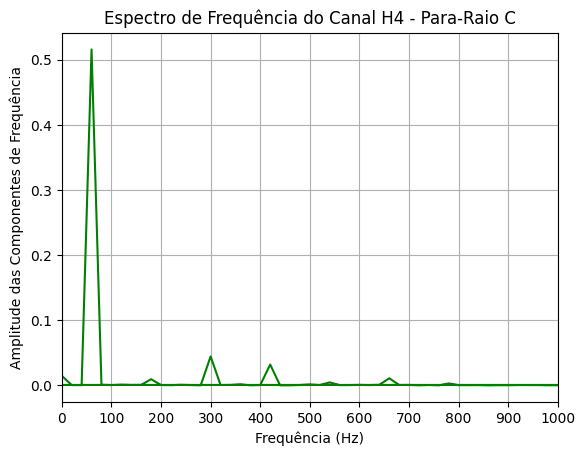

In [143]:
tempo4 = novo_CH4_Osc_1['Tempo4']
amplitude4 = corrente_CH4

# Passo 3: Calcular a FFT
fft_amplitude_Corrente_C = np.fft.fft(amplitude4)

# Ângulos
angulo_Corrente_C = np.angle(fft_amplitude_Corrente_C)

#Valores absolutos
valores_absolutos_Corrente_C = np.abs(fft_amplitude_Corrente_C)

# Passo 4: Calcular as frequências correspondentes
frequencias_Corrente_C = np.fft.fftfreq(len(tempo4), tempo4[1] - tempo4[0])

# Passo 5: Plotar o espectro de frequência
plt.plot(frequencias_Corrente_C, np.abs(fft_amplitude_Corrente_C), color = 'green')
plt.title('Espectro de Frequência do Canal H4 - Para-Raio C')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude das Componentes de Frequência')
plt.grid(True)
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1001, 100))
plt.show()

In [144]:
# Convertendo os ângulos para graus
angulo_graus_Corrente_C = np.degrees(angulo_Corrente_C)

# Listas para salvar os valores de frequência, módulo e ângulo para TENSÃO.
frequencias_salvas_Corrente_C = []
modulos_salvos_Corrente_C = []
angulos_salvos_Corrente_C = []
frequencias_multiplos_60_Corrente_C = []
modulos_multiplos_60_Corrente_C = []
angulos_multiplos_60_Corrente_C = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro da corrente C\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for f_Corrente_C, mod_Corrente_C, ang_graus_Corrente_C in zip(frequencias_Corrente_C[frequencias_Corrente_C > 0], valores_absolutos_Corrente_C[frequencias_Corrente_C > 0], angulo_graus_Corrente_C[frequencias_Corrente_C > 0]):

  if (f_Corrente_C > 60) and (f_Corrente_C < 1000) and (mod_Corrente_C > 2e-3):
    print(f"{f_Corrente_C:.2f}\t\t\t{mod_Corrente_C:.4f}\t\t\t{ang_graus_Corrente_C:.2f}°")
    frequencias_salvas_Corrente_C.append(f_Corrente_C)
    modulos_salvos_Corrente_C.append(mod_Corrente_C)
    angulos_salvos_Corrente_C.append(ang_graus_Corrente_C)

Valores do espectro da corrente C

Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02			0.5158			-176.69°
180.07			0.0096			-134.68°
300.12			0.0445			19.22°
420.17			0.0320			166.54°
540.22			0.0047			54.50°
660.26			0.0110			9.56°
780.31			0.0031			61.36°


In [145]:
# Encontrar a frequência com a maior amplitude
indice_fundamental_Corrente_C = np.argmax(modulos_salvos_Corrente_C)
frequencia_fundamental_Corrente_C = frequencias_salvas_Corrente_C[indice_fundamental_Corrente_C]

print("Frequência fundamental:", frequencia_fundamental_Corrente_C)

# Listas para armazenar os múltiplos
frequencias_multiplos_Corrente_C = []
modulos_multiplos_Corrente_C = []
angulos_multiplos_Corrente_C = []

# Verificar os múltiplos da frequência fundamental
for i, frequencia_Corrente_C in enumerate(frequencias_salvas_Corrente_C):
    if frequencia_Corrente_C % frequencia_fundamental_Corrente_C == 0:
        frequencias_multiplos_Corrente_C.append(frequencia_Corrente_C)
        modulos_multiplos_Corrente_C.append(modulos_salvos_Corrente_C[i])
        angulos_multiplos_Corrente_C.append(angulos_salvos_Corrente_C[i])

# Imprimir os múltiplos encontrados
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_Corrente_C)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_Corrente_C, modulos_multiplos_Corrente_C, angulos_multiplos_Corrente_C):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t {angulo:.2f}")

Frequência fundamental: 60.02400960384398
Múltiplos da frequência fundamental:  60.02400960384398


Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02		 0.5158025341			 -176.69
180.07		 0.0095748532			 -134.68
300.12		 0.0445349490			 19.22
420.17		 0.0320410443			 166.54
540.22		 0.0046727782			 54.50
660.26		 0.0109768029			 9.56
780.31		 0.0030972612			 61.36


# Espectro da Corrente de Fuga do Para-Raios D

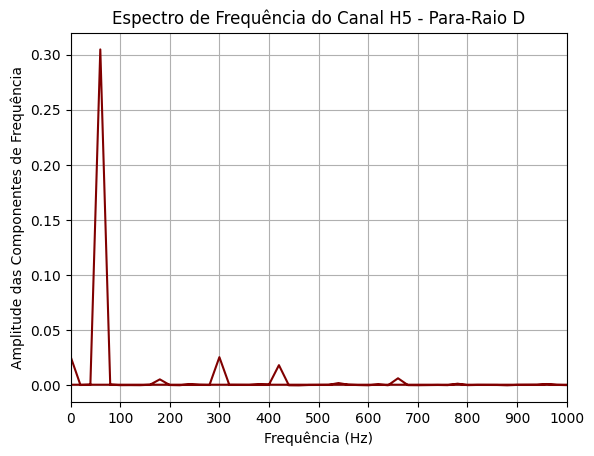

In [146]:
tempo5 = novo_CH2_Osc_2['Tempo5']
amplitude5 = corrente_CH5

# Passo 3: Calcular a FFT
fft_amplitude_Corrente_D = np.fft.fft(amplitude5)

# Ângulos
angulo_Corrente_D = np.angle(fft_amplitude_Corrente_D)

#Valores absolutos
valores_absolutos_Corrente_D = np.abs(fft_amplitude_Corrente_D)

# Passo 4: Calcular as frequências correspondentes
frequencias_Corrente_D = np.fft.fftfreq(len(tempo5), tempo5[1] - tempo5[0])

# Passo 5: Plotar o espectro de frequência
plt.plot(frequencias_Corrente_D, np.abs(fft_amplitude_Corrente_D), color = 'maroon')
plt.title('Espectro de Frequência do Canal H5 - Para-Raio D')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude das Componentes de Frequência')
plt.grid(True)
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1001, 100))
plt.show()

In [147]:
# Dados para corrente_D
angulo_graus_Corrente_D = np.degrees(angulo_Corrente_D)

# Listas para salvar os valores de frequência, módulo e ângulo para CORRENTE D.
frequencias_salvas_Corrente_D = []
modulos_salvos_Corrente_D = []
angulos_salvos_Corrente_D = []
frequencias_multiplos_60_Corrente_D = []
modulos_multiplos_60_Corrente_D = []
angulos_multiplos_60_Corrente_D = []

# Imprimindo os valores do espectro da CORRENTE D
print("Valores do espectro da corrente D\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for f_Corrente_D, mod_Corrente_D, ang_graus_Corrente_D in zip(frequencias_Corrente_D[frequencias_Corrente_D > 0], valores_absolutos_Corrente_D[frequencias_Corrente_D > 0], angulo_graus_Corrente_D[frequencias_Corrente_D > 0]):

    if (f_Corrente_D > 60) and (f_Corrente_D < 1000) and (mod_Corrente_D > 2e-3):
        print(f"{f_Corrente_D:.2f}\t\t\t{mod_Corrente_D:.4f}\t\t\t{ang_graus_Corrente_D:.2f}°")
        frequencias_salvas_Corrente_D.append(f_Corrente_D)
        modulos_salvos_Corrente_D.append(mod_Corrente_D)
        angulos_salvos_Corrente_D.append(ang_graus_Corrente_D)


Valores do espectro da corrente D

Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02			0.3046			174.29°
180.07			0.0055			-111.03°
300.12			0.0256			-6.39°
420.17			0.0184			131.14°
540.22			0.0022			7.16°
660.26			0.0065			-36.45°


In [148]:
# Encontrar a frequência com a maior amplitude para corrente_D
indice_fundamental_Corrente_D = np.argmax(modulos_salvos_Corrente_D)
frequencia_fundamental_Corrente_D = frequencias_salvas_Corrente_D[indice_fundamental_Corrente_D]

print("Frequência fundamental:", frequencia_fundamental_Corrente_D)

# Listas para armazenar os múltiplos de corrente_D
frequencias_multiplos_Corrente_D = []
modulos_multiplos_Corrente_D = []
angulos_multiplos_Corrente_D = []

# Verificar os múltiplos da frequência fundamental de corrente_D
for i, frequencia_Corrente_D in enumerate(frequencias_salvas_Corrente_D):
    if frequencia_Corrente_D % frequencia_fundamental_Corrente_D == 0:
        frequencias_multiplos_Corrente_D.append(frequencia_Corrente_D)
        modulos_multiplos_Corrente_D.append(modulos_salvos_Corrente_D[i])
        angulos_multiplos_Corrente_D.append(angulos_salvos_Corrente_D[i])

# Imprimir os múltiplos encontrados de corrente_D
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_Corrente_D)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_Corrente_D, modulos_multiplos_Corrente_D, angulos_multiplos_Corrente_D):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t {angulo:.2f}")



Frequência fundamental: 60.02400960384398
Múltiplos da frequência fundamental:  60.02400960384398


Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02		 0.3046379020			 174.29
180.07		 0.0055188936			 -111.03
300.12		 0.0256475481			 -6.39
420.17		 0.0183948485			 131.14
540.22		 0.0021743620			 7.16
660.26		 0.0065082999			 -36.45


# Espectro da Corrente de Fuga do Para-Raios E

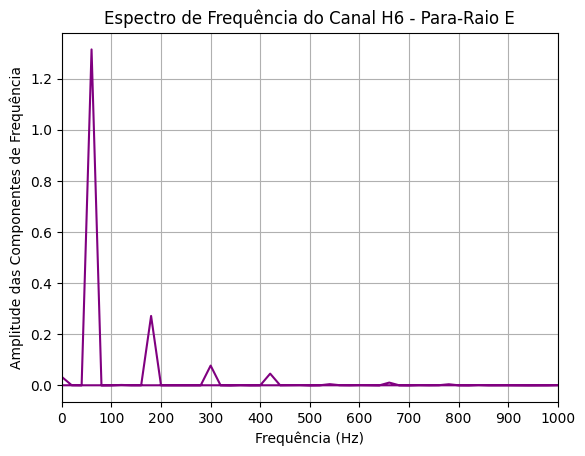

In [149]:
tempo6 = novo_CH3_Osc_2['Tempo6']
amplitude6 = corrente_CH6

# Passo 3: Calcular a FFT
fft_amplitude_Corrente_E = np.fft.fft(amplitude6)

# Ângulos
angulo_Corrente_E = np.angle(fft_amplitude_Corrente_E)

#Valores absolutos
valores_absolutos_Corrente_E = np.abs(fft_amplitude_Corrente_E)

# Passo 4: Calcular as frequências correspondentes
frequencias_Corrente_E = np.fft.fftfreq(len(tempo6), tempo6[1] - tempo6[0])

# Passo 5: Plotar o espectro de frequência
plt.plot(frequencias_Corrente_E, np.abs(fft_amplitude_Corrente_E), color = 'purple')
plt.title('Espectro de Frequência do Canal H6 - Para-Raio E')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude das Componentes de Frequência')
plt.grid(True)
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1001, 100))
plt.show()

In [150]:
# Convertendo os ângulos para graus para corrente_E
angulo_graus_Corrente_E = np.degrees(angulo_Corrente_E)

# Listas para salvar os valores de frequência, módulo e ângulo para corrente_E
frequencias_salvas_Corrente_E = []
modulos_salvos_Corrente_E = []
angulos_salvos_Corrente_E = []
frequencias_multiplos_60_Corrente_E = []
modulos_multiplos_60_Corrente_E = []
angulos_multiplos_60_Corrente_E = []

# Imprimindo os valores do espectro de corrente_E
print("Valores do espectro da corrente E\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for f_Corrente_E, mod_Corrente_E, ang_graus_Corrente_E in zip(frequencias_Corrente_E[frequencias_Corrente_E > 0], valores_absolutos_Corrente_E[frequencias_Corrente_E > 0], angulo_graus_Corrente_E[frequencias_Corrente_E > 0]):

    if (f_Corrente_E > 60) and (f_Corrente_E < 1000) and (mod_Corrente_E > 2.5e-3):
        print(f"{f_Corrente_E:.2f}\t\t\t{mod_Corrente_E:.4f}\t\t\t{ang_graus_Corrente_E:.2f}°")
        frequencias_salvas_Corrente_E.append(f_Corrente_E)
        modulos_salvos_Corrente_E.append(mod_Corrente_E)
        angulos_salvos_Corrente_E.append(ang_graus_Corrente_E)

# Agora vamos continuar com a adaptação do código para 'E'.


Valores do espectro da corrente E

Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02			1.3143			116.46°
180.07			0.2718			-102.16°
300.12			0.0776			-62.41°
420.17			0.0461			101.48°
540.22			0.0050			-92.10°
660.26			0.0111			-68.25°
780.31			0.0046			1.98°


In [151]:
# Encontrar a frequência com a maior amplitude para corrente_E
indice_fundamental_Corrente_E = np.argmax(modulos_salvos_Corrente_E)
frequencia_fundamental_Corrente_E = frequencias_salvas_Corrente_E[indice_fundamental_Corrente_E]

print("Frequência fundamental:", frequencia_fundamental_Corrente_E)

# Listas para armazenar os múltiplos de corrente_E
frequencias_multiplos_Corrente_E = []
modulos_multiplos_Corrente_E = []
angulos_multiplos_Corrente_E = []

# Verificar os múltiplos da frequência fundamental de corrente_E
for i, frequencia_Corrente_E in enumerate(frequencias_salvas_Corrente_E):
    if frequencia_Corrente_E % frequencia_fundamental_Corrente_E == 0:
        frequencias_multiplos_Corrente_E.append(frequencia_Corrente_E)
        modulos_multiplos_Corrente_E.append(modulos_salvos_Corrente_E[i])
        angulos_multiplos_Corrente_E.append(angulos_salvos_Corrente_E[i])

# Imprimir os múltiplos encontrados de corrente_E
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_Corrente_E)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_Corrente_E, modulos_multiplos_Corrente_E, angulos_multiplos_Corrente_E):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t {angulo:.2f}")


Frequência fundamental: 60.02400960384398
Múltiplos da frequência fundamental:  60.02400960384398


Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02		 1.3143340246			 116.46
180.07		 0.2717849581			 -102.16
300.12		 0.0776054535			 -62.41
420.17		 0.0460931909			 101.48
540.22		 0.0049504003			 -92.10
660.26		 0.0110980345			 -68.25
780.31		 0.0045500515			 1.98


# Calculando a Distorção Harmônica  
### Tensão

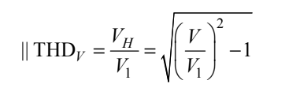

In [152]:
#frequencias_multiplos_tensao_array = np.array(frequencias_multiplos_tensao)
modulos_multiplos_tensao_array = np.array(modulos_multiplos_tensao)

soma_v = 0
for i in modulos_multiplos_tensao_array:
    soma_v = soma_v + (i / modulos_multiplos_tensao_array[0])**2


soma_v = soma_v - 1
THD_v = np.sqrt(soma_v)

print(f"O valor da Distorção Harmônica da tensão (THDv) é: {THD_v * 100:.10f} %")

O valor da Distorção Harmônica da tensão (THDv) é: 2.1144465932 %


### Correte de Fuga do PR-A

In [153]:
#frequencias_multiplos_Corrente_A_array = np.array(frequencias_multiplos_Corrente_A)
modulos_multiplos_Corrente_A_array = np.array(modulos_multiplos_Corrente_A)

soma_Corrente_A = 0
for i in modulos_multiplos_Corrente_A_array:
    soma_Corrente_A = soma_Corrente_A + (i / modulos_multiplos_Corrente_A_array[0])**2

soma_Corrente_A = soma_Corrente_A - 1
THD_Corrente_A = np.sqrt(soma_Corrente_A)

print(f"O valor da Distorção Harmônica da corrente A (THD_Corrente_A) é: {THD_Corrente_A * 100:.10f} %")

O valor da Distorção Harmônica da corrente A (THD_Corrente_A) é: 11.9155607548 %


### Corrente de Fuga do PR-B

In [154]:
#frequencias_multiplos_Corrente_B_array = np.array(frequencias_multiplos_Corrente_B)
modulos_multiplos_Corrente_B_array = np.array(modulos_multiplos_Corrente_B)

soma_Corrente_B = 0
for i in modulos_multiplos_Corrente_B_array:
    soma_Corrente_B = soma_Corrente_B + (i / modulos_multiplos_Corrente_B_array[0])**2

soma_Corrente_B = soma_Corrente_B - 1
THD_Corrente_B = np.sqrt(soma_Corrente_B)

print(f"O valor da Distorção Harmônica da corrente B (THD_Corrente_B) é: {THD_Corrente_B * 100:.10f} %")

O valor da Distorção Harmônica da corrente B (THD_Corrente_B) é: 19.5135510641 %


### Corrente de Fuga do PR-C

In [155]:
#frequencias_multiplos_Corrente_C_array = np.array(frequencias_multiplos_Corrente_C)
modulos_multiplos_Corrente_C_array = np.array(modulos_multiplos_Corrente_C)

soma_Corrente_C = 0
for i in modulos_multiplos_Corrente_C_array:
    soma_Corrente_C = soma_Corrente_C + (i / modulos_multiplos_Corrente_C_array[0])**2

soma_Corrente_C = soma_Corrente_C - 1
THD_Corrente_C = np.sqrt(soma_Corrente_C)

print(f"O valor da Distorção Harmônica da corrente C (THD_Corrente_C) é: {THD_Corrente_C * 100:.10f} %")

O valor da Distorção Harmônica da corrente C (THD_Corrente_C) é: 11.0585371435 %


### Corrente de Fuga do PR-D

In [156]:
# Convertendo a lista de múltiplos para um array numpy
modulos_multiplos_Corrente_D_array = np.array(modulos_multiplos_Corrente_D)

soma_Corrente_D = 0
for i in modulos_multiplos_Corrente_D_array:
    soma_Corrente_D = soma_Corrente_D + (i / modulos_multiplos_Corrente_D_array[0])**2

soma_Corrente_D = soma_Corrente_D - 1
THD_Corrente_D = np.sqrt(soma_Corrente_D)

print(f"O valor da Distorção Harmônica da corrente D (THD_Corrente_D) é: {THD_Corrente_D * 100:.10f} %")

O valor da Distorção Harmônica da corrente D (THD_Corrente_D) é: 10.7562231099 %


### Corrente de Fuga PR-E

In [157]:
# Convertendo a lista de múltiplos para um array numpy
modulos_multiplos_Corrente_E_array = np.array(modulos_multiplos_Corrente_E)

soma_Corrente_E = 0
for i in modulos_multiplos_Corrente_E_array:
    soma_Corrente_E = soma_Corrente_E + (i / modulos_multiplos_Corrente_E_array[0])**2

soma_Corrente_E = soma_Corrente_E - 1
THD_Corrente_E = np.sqrt(soma_Corrente_E)

print(f"O valor da Distorção Harmônica da corrente E (THD_Corrente_E) é: {THD_Corrente_E * 100:.10f} %")


O valor da Distorção Harmônica da corrente E (THD_Corrente_E) é: 21.8114361110 %


# Potencia Ativa Não Fundamental

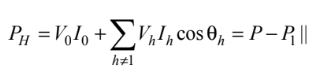

In [158]:
# Calculando potência para DC
V_o = 0
I_o = 0

P_o = V_o * I_o
P_o

0

# Somatório das Potências Harmônicas das correntes de fuga dos Para-Raios

### PR-A

In [159]:
soma_harmonic_1 = 0

for f_A, v_A, i_A, angulo_tensao_A, angulo_corrente_A  in zip(frequencias_salvas_tensao, modulos_salvos_tensao, modulos_salvos_Corrente_A, angulos_salvos_tensao, angulos_salvos_Corrente_A):
  if (f_A > 61): # Somatório das harmônicas sem a frequência de 60 Hz (Fundamental)
    soma_harmonic_1 = soma_harmonic_1 + v_A * i_A * np.cos(angulo_tensao_A - angulo_corrente_A)


print('\nPotência não fundamental PR-A: ',soma_harmonic_1)


Potência não fundamental PR-A:  0.2955150617604343


In [160]:
# Calculando Potência não Fundamental
P_A = P_o + soma_harmonic_1
P_A

0.2955150617604343

### PR-B

In [161]:
soma_harmonic_2 = 0

for f_B, v_B, i_B, angulo_tensao_B, angulo_corrente_B  in zip(frequencias_salvas_tensao, modulos_salvos_tensao, modulos_salvos_Corrente_B, angulos_salvos_tensao, angulos_salvos_Corrente_B):
  if (f_B > 61): # Somatório das harmônicas sem a frequência de 60 Hz (Fundamental)
    soma_harmonic_2 = soma_harmonic_2 + v_B * i_B * np.cos(angulo_tensao_B - angulo_corrente_B)

print('\nPotência não fundamental PR-B: ',soma_harmonic_2)


Potência não fundamental PR-B:  0.46347218457715006


In [162]:
# Calculando Potência não Fundamental
P_B = P_o + soma_harmonic_2
P_B

0.46347218457715006

### PR-C

In [163]:
# Somatório das harmônicas das potências harmônicas usando a corrente de fuga do canal H4 - Para-Raio C
soma_harmonic_3 = 0

for f_C, v_C, i_C, angulo_tensao_C, angulo_corrente_C  in zip(frequencias_salvas_tensao, modulos_salvos_tensao, modulos_salvos_Corrente_C, angulos_salvos_tensao, angulos_salvos_Corrente_C):
  if (f_C > 61): # Somatório das harmônicas sem a frequência de 60 Hz (Fundamental)
    soma_harmonic_3 = soma_harmonic_3 + v_C * i_C * np.cos(angulo_tensao_C - angulo_corrente_C)

print('\nPotência não fundamental PR-C: ',soma_harmonic_3)


Potência não fundamental PR-C:  0.40689009582426433


In [164]:
print(angulo_tensao_C)

72.72903375473346


In [165]:
# Calculando Potência não Fundamental
P_C = P_o + soma_harmonic_3
P_C

0.40689009582426433

### PR-D

In [166]:
# Somatório das harmônicas das potências harmônicas usando a corrente de fuga do canal H4 - Para-Raio D
soma_harmonic_4 = 0

for f_D, v_D, i_D, angulo_tensao_D, angulo_corrente_D in zip(frequencias_salvas_tensao, modulos_salvos_tensao, modulos_salvos_Corrente_D, angulos_salvos_tensao, angulos_salvos_Corrente_D):
  if (f_D > 61): # Somatório das harmônicas sem a frequência de 60 Hz (Fundamental)
    soma_harmonic_4 = soma_harmonic_4 + v_D * i_D * np.cos(angulo_tensao_D - angulo_corrente_D)

print('\nPotência não fundamental PR-D: ', soma_harmonic_4)



Potência não fundamental PR-D:  0.09567179057433134


In [167]:
# Calculando Potência não Fundamental
P_D = P_o + soma_harmonic_4
P_D

0.09567179057433134

### PR-E

In [168]:
# Somatório das harmônicas das potências harmônicas usando a corrente de fuga do canal H4 - Para-Raio E
soma_harmonic_5 = 0

for f_E, v_E, i_E, angulo_tensao_E, angulo_corrente_E in zip(frequencias_salvas_tensao, modulos_salvos_tensao, modulos_salvos_Corrente_E, angulos_salvos_tensao, angulos_salvos_Corrente_E):
  if (f_E > 61): # Somatório das harmônicas sem a frequência de 60 Hz (Fundamental)
    soma_harmonic_5 = soma_harmonic_5 + v_E * i_E * np.cos(angulo_tensao_E - angulo_corrente_E)

print('\nPotência não fundamental PR-E: ', soma_harmonic_5)



Potência não fundamental PR-E:  0.5058474470466089


In [169]:
# Calculando Potência não Fundamental
P_E = P_o + soma_harmonic_5
P_E

0.5058474470466089

# Fator de Potência Fundamental

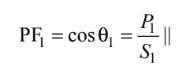

In [170]:
# Calculando o fator de potencia fundamental Para-Raio A
FP_1_A = np.cos(angulos_multiplos_tensao[0] - (angulos_multiplos_Corrente_A[0]))
print(FP_1_A)

0.5804014227088071


In [171]:
# Calculando o fator de potencia fundamental Para-Raio B
FP_1_B = np.cos(angulos_multiplos_tensao[0] - (angulos_multiplos_Corrente_B[0]))
print(FP_1_B)

0.42888007099878106


In [172]:
# Calculando o fator de potencia fundamental Para-Raio C
FP_1_C = np.cos(angulos_multiplos_tensao[0] - (360 - angulos_multiplos_Corrente_C[0]))
print(FP_1_C)

0.9576483516170122


In [173]:
# Calculando o fator de potência fundamental Para-Raio D
FP_1_D = np.cos(angulos_multiplos_tensao[0] - (360 - angulos_multiplos_Corrente_D[0]))
print(FP_1_D)


0.8305785106913948


In [174]:
# Calculando o fator de potência fundamental Para-Raio E
FP_1_E = np.cos(angulos_multiplos_tensao[0] - (angulos_multiplos_Corrente_E[0]))
print(FP_1_E)


0.9008392409656817


# Potênia Ativa Fundamental

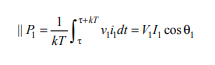

In [175]:
P_1_A = modulos_multiplos_tensao[0] * modulos_multiplos_Corrente_A[0] * np.cos(angulos_multiplos_tensao[0] - (angulos_multiplos_Corrente_A[0]))
P_1_A

146.62443570661924

In [176]:
P_1_B = modulos_multiplos_tensao[0] * modulos_multiplos_Corrente_B[0] * np.cos(angulos_multiplos_tensao[0] - (angulos_multiplos_Corrente_B[0]))
P_1_B

179.1101393375726

In [177]:
P_1_C = modulos_multiplos_tensao[0] * modulos_multiplos_Corrente_C[0] * np.cos(angulos_multiplos_tensao[0] - (360 - angulos_multiplos_Corrente_C[0]))
P_1_C

233.26875966127238

In [178]:
P_1_D = modulos_multiplos_tensao[0] * modulos_multiplos_Corrente_D[0] * np.cos(angulos_multiplos_tensao[0] - (360 - angulos_multiplos_Corrente_D[0]))
P_1_D


119.49002984329756

In [179]:
P_1_E = modulos_multiplos_tensao[0] * modulos_multiplos_Corrente_E[0] * np.cos(angulos_multiplos_tensao[0] - (angulos_multiplos_Corrente_E[0]))
P_1_E


559.1393921306787

# Potência Ativa

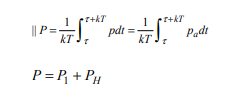

In [180]:
P_A = P_o + soma_harmonic_1
P_A

0.2955150617604343

In [181]:
P_B = P_o + soma_harmonic_2
P_B

0.46347218457715006

In [182]:
P_C = P_o + soma_harmonic_3
P_C

0.40689009582426433

In [183]:
P_D = P_o + soma_harmonic_4
P_D

0.09567179057433134

In [184]:
P_E = P_o + soma_harmonic_5
P_E

0.5058474470466089

# Fator de Potência Final

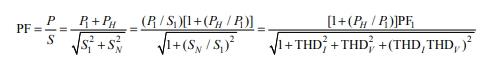

In [185]:
FP_A = ((1 + (P_A/P_1_A)) * FP_1_A) / np.sqrt(1 + np.square(THD_Corrente_A) + np.square(THD_v) + np.square(THD_Corrente_A * THD_v))
print(f'O fator de potência Pra-Raio A é: {FP_A}')

O fator de potência Pra-Raio A é: 0.5773570043725681


In [186]:
FP_B = ((1 + (P_B/P_1_B)) * FP_1_B) / np.sqrt(1 + np.square(THD_Corrente_B) + np.square(THD_v) + np.square(THD_Corrente_B * THD_v))
print(f'O fator de potência Pra-Raio B é: {FP_B}')

O fator de potência Pra-Raio B é: 0.42193561323733525


In [187]:
FP_C = ((1 + (P_C/P_1_C)) * FP_1_C) / np.sqrt(1 + np.square(THD_Corrente_C) + np.square(THD_v) + np.square(THD_Corrente_C * THD_v))
print(f'O fator de potência Pra-Raio C é: {FP_C}')

O fator de potência Pra-Raio C é: 0.9532931393574922


In [188]:
FP_D = ((1 + (P_D/P_1_D)) * FP_1_D) / np.sqrt(1 + np.square(THD_Corrente_D) + np.square(THD_v) + np.square(THD_Corrente_D * THD_v))
print(f'O fator de potência Para-Raio D é: {FP_D}')


O fator de potência Para-Raio D é: 0.8262915713624114


In [189]:
FP_E = ((1 + (P_E/P_1_E)) * FP_1_E) / np.sqrt(1 + np.square(THD_Corrente_E) + np.square(THD_v) + np.square(THD_Corrente_E * THD_v))
print(f'O fator de potência Para-Raio E é: {FP_E}')

O fator de potência Para-Raio E é: 0.8807458958837339
